In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/home/kawahara/exojax/data/clouds/drag_force.txt",comment="#",delimiter=",")

In [5]:
Nre=data["Nre"].values
logNre=np.log(Nre) #Reynolds number
Cd=(data["Cd_rigid"].values)
logNd=np.log(Nre**2*Cd)

Cdinf=0.45
Nreinf=np.logspace(3,5,30)
logNreinf=np.log(Nreinf)
logNdinf=np.log(Nreinf**2*Cdinf)

In [7]:
coeff=np.polyfit(logNd,logNre,2)
coeff

array([-0.00883374,  0.84514511, -2.49105354])

In [49]:
#boundary between the Stokes flow and the mid Nre regime
#-0.00883374*xarr**2+(0.84514511-1)*xarr-2.49105354 +log(24) = 0
a=-0.0088 #coeff[0]
b=0.85-1 #coeff[1]-1
c=-2.49+np.log(24.) #coeff[2]+np.log(24.)
logNdc=(-b-np.sqrt(b*b-4*a*c))/(2*a)
Ndc=np.exp(logNdc)
Nrec=np.exp(logNdc-np.log(24.))

In [50]:
logNdc, Ndc, Nrec

(3.7583482270854875, 42.87754348901474, 1.7865643120422807)

In [53]:
#boundary between the mid and large Nre regime
#-0.00883374*xarr**2+(0.84514511-0.5)*xarr-2.49105354 +0.5*log(0.45) = 0
a=-0.0088 #coeff[0]
b=0.85-0.5 #coeff[1]-0.5
c=-2.49+0.5*np.log(0.45) #coeff[2]+0.5*np.log(0.45)
logNde=(-b+np.sqrt(b*b-4*a*c))/(2*a)
Nde=np.exp(logNde)
Nree=np.exp(0.5*logNde-0.5*np.log(0.45))

In [54]:
logNde, Nde, Nree

(11.692270778931425, 119643.38181447262, 515.629888398587)

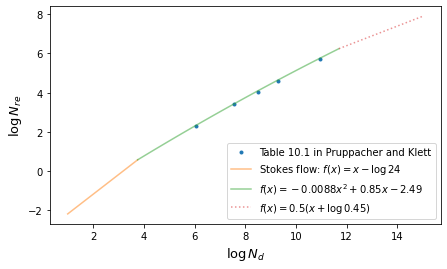

In [74]:
plt.figure(figsize=(7,4))
plt.plot(logNd,logNre,".",label="Table 10.1 in Pruppacher and Klett")

xarr=np.linspace(1,logNdc,100)
plt.plot(xarr,xarr - np.log(24.),alpha=0.5,label="Stokes flow: $f(x)=x-\log{24}$")
xarr=np.linspace(logNdc,logNde,100)
plt.plot(xarr,-0.0088*xarr**2+0.85*xarr-2.49,alpha=0.5,label="$f(x)=-0.0088 x^2+0.85 x-2.49$")
#plt.plot(xarr,0.8*xarr-0.01*xarr**2,label="$y=0.8x-0.01x^2$ (AM01)")

xarr=np.linspace(logNde,15,100)
plt.plot(xarr,0.5*(xarr-np.log(0.45)) ,alpha=0.5,ls="dotted",label="$f(x)=0.5(x+\\log{0.45})$  ")
plt.xlabel("$\\log{N_d}$",fontsize=13)
plt.ylabel("$\\log{N_{re}}$",fontsize=13)
plt.legend(loc="lower right")
plt.savefig("davies_reynolds.png")

In [1]:
from exojax.atm.vterm import vf

In [2]:
import exojax.atm.viscosity as vc
import jax.numpy as jnp
r=1.e-4
g=1.e5
drho=1.0
eta=vc.eta_Rosner_H2(1000.0)
Nre=jnp.logspace(-3,5,240)

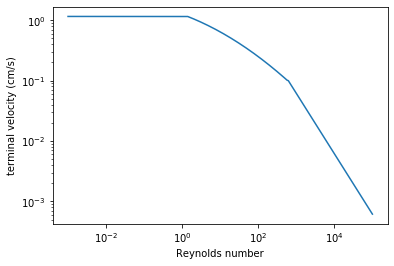

In [10]:
plt.plot(Nre,vf(r,g,eta,drho,Nre))
plt.xscale("log")
plt.yscale("log")
plt.ylabel("terminal velocity (cm/s)")
plt.xlabel("Reynolds number")
plt.savefig()
plt.show()